In [1]:
# To enable plotting graphs in jupyter notebook

%matplotlib inline

In [2]:
# numerical libraries
import numpy as np

from sklearn.model_selection import train_test_split

# import linear regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in terms of rows and columns
import pandas as pd

# import plotting libraries
import matplotlib.pyplot as plt

# importing seaborn for statistical plots
import seaborn as sns

In [7]:
# reading the csv file

colnames = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name']

mpg_df = pd.read_csv('auto-mpg1.csv', names = colnames)

In [8]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cyl,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
disp,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
hp,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
wt,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acc,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
yr,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


In [10]:
# Taking care of non-numeric values

temp = pd.DataFrame(mpg_df.hp.str.isdecimal())
temp[temp['hp'] == False]

AttributeError: Can only use .str accessor with string values!

In [11]:
mpg_df = mpg_df.replace('?', np.nan)

In [12]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         406 non-null int64
disp        406 non-null float64
hp          400 non-null float64
wt          406 non-null int64
acc         406 non-null float64
yr          406 non-null int64
origin      406 non-null int64
car_name    406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [13]:
# To convert string to numeric columns


mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [14]:
# Dividing the variables into independent and dependent variables

numeric_cols = mpg_df.drop('car_name', axis=1)


# Adding the dependent variable into its own dataframe
car_names = pd.DataFrame(mpg_df[['car_name']])

# Replace 'na' variables with median

numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median(), axis = 0))

# Recreating the dataframe (mpg_df) by combining numerical columns with car names

mpg_df = numeric_cols.join(car_names)

mpg_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg         406 non-null float64
cyl         406 non-null int64
disp        406 non-null float64
hp          406 non-null float64
wt          406 non-null int64
acc         406 non-null float64
yr          406 non-null int64
origin      406 non-null int64
car_name    406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


# Let's do a pairplot analysis to visually check the number of likely clusters

C:\Users\alimojadam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alimojadam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


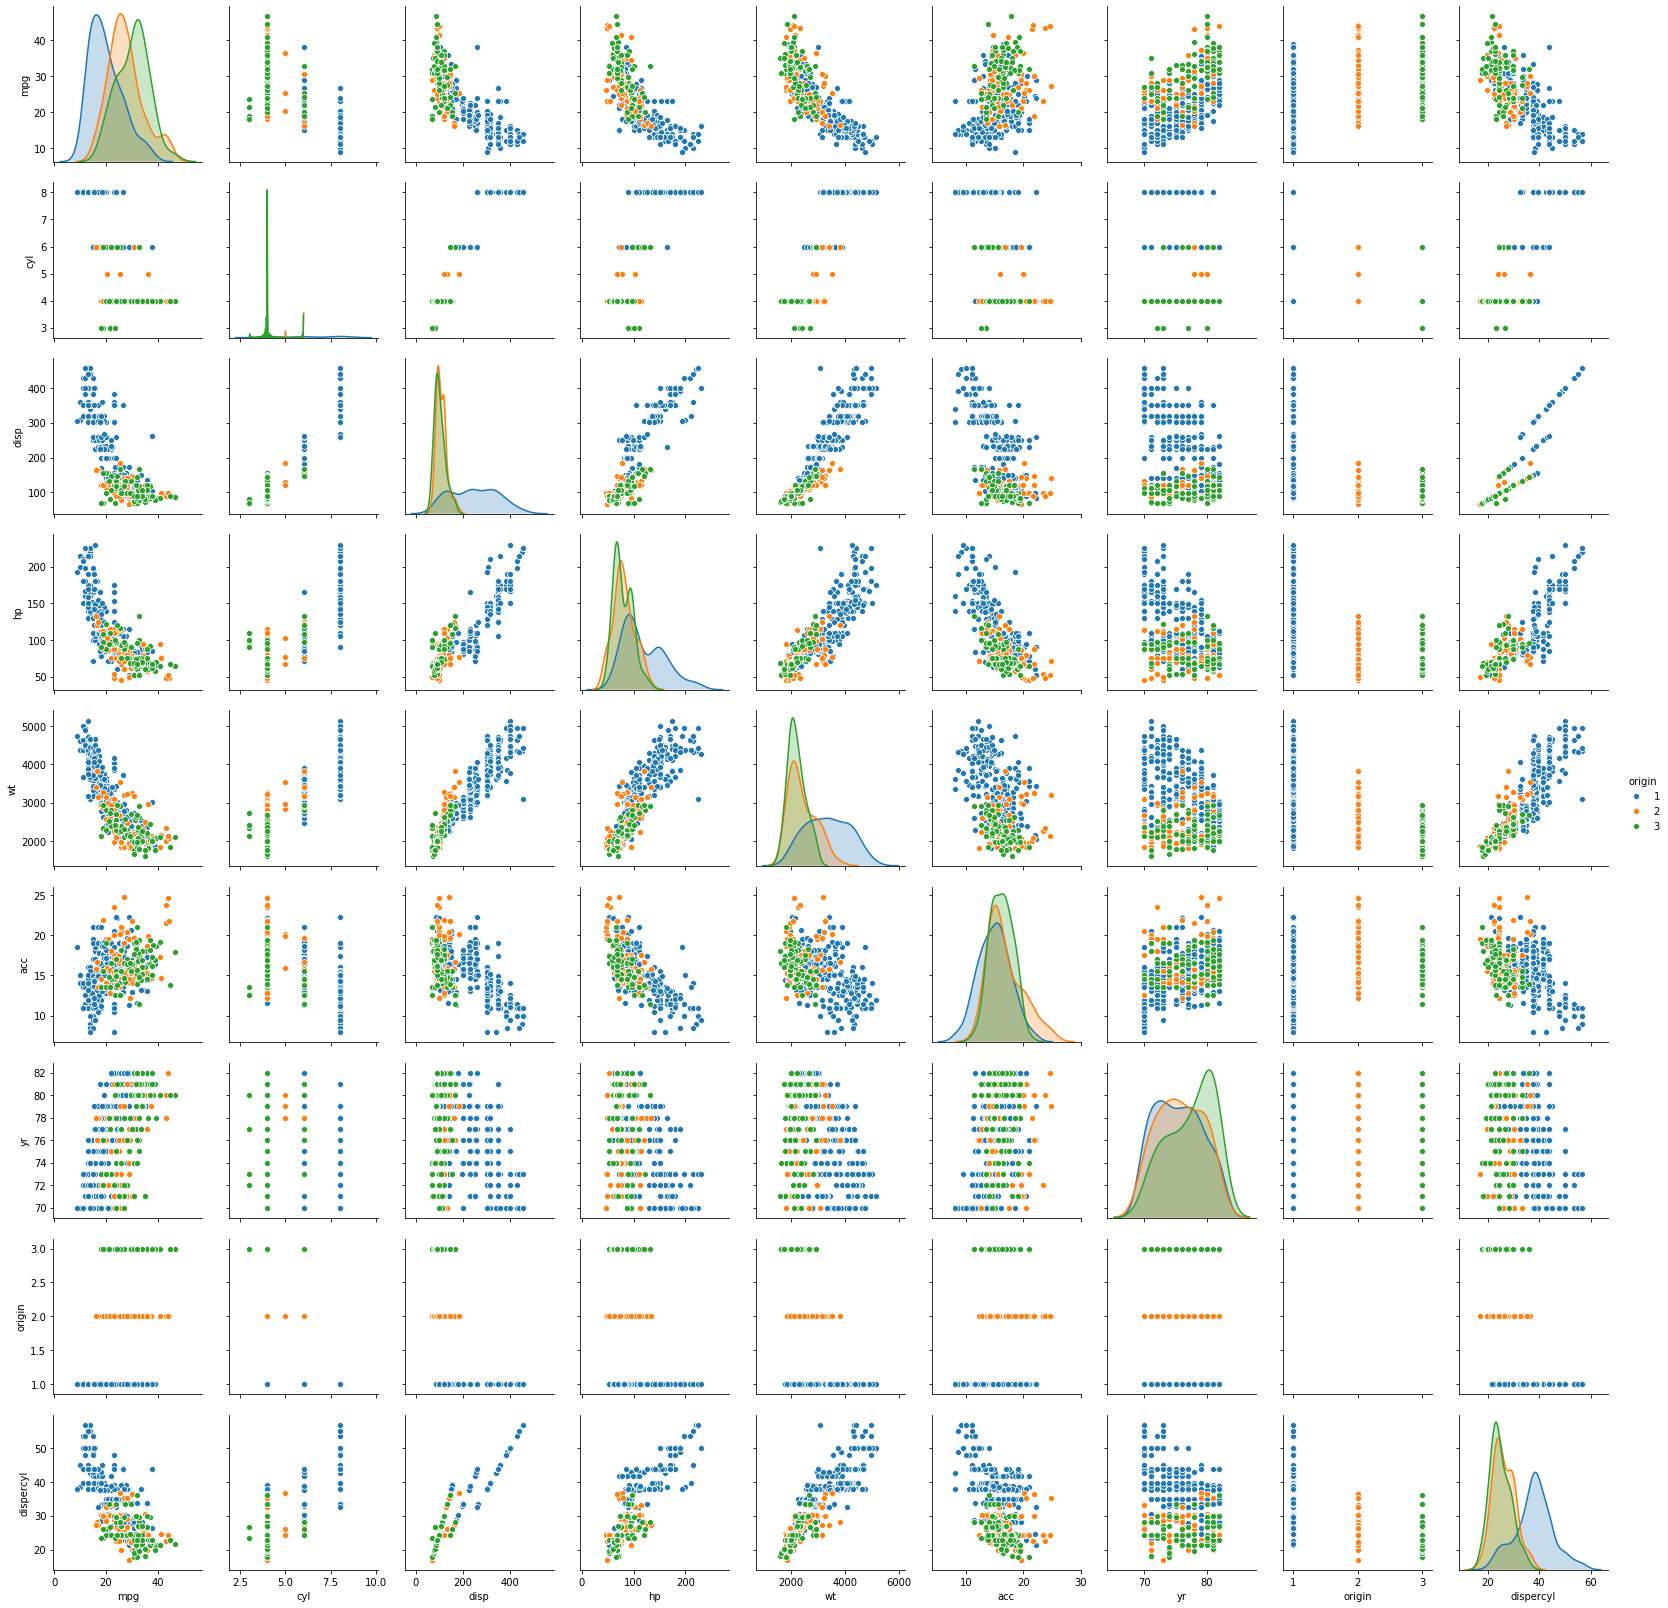

In [15]:
# Using the scatter matrix function we'll create a dashboard that can be saved as a .png file and viewed in a larger size

mpg_df_attr = mpg_df.iloc[ : , 0:9]

# Adding a column to mpg_df
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']

mpg_df_attr.head()

# To get histograms of distributions on the diagonal
# sns.pairplot(mpg_df_attr)

# To get density curves on the diagonal
sns.pairplot(mpg_df_attr, diag_kind = 'kde', hue = 'origin')

# K-Means Klusterting

In [16]:
from scipy.stats import zscore

# specifying rows and columns using label names
mpg_df_attr = mpg_df.loc[: , 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

# remove 'origin' and 'yr' columns
mpg_df_attr_z.pop('origin')
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values


In [18]:
# Basd on 'origin' there should be only 3 clusters (1,2,3 --America, Europe, Asia).
# However, pairplots showed that there are more than 3 clusters.
# For K-Means clustering analysis we'll predict that the optimal number of clusters
# falls between 2 and 6.

cluster_range = range(2, 6)
cluster_errors = []
for num_clusters in cluster_range:
    
# n_init: number of time the k-means algorithm will be run 
# with different centroid seeds. The final results will be the best output of n_init
# consecutive runs in terms of inertia.
    clusters = KMeans(num_clusters, n_init = 5)
# I want the clusters to fit the curvature of my dataframe
    clusters.fit(mpg_df_attr)
# 'labels_' gives the label of each point
    labels = clusters.labels_
# 'cluster_centers_' to coordinate the cluster centers????
    centroids = clusters.cluster_centers_
# 'inertia_': sum of squared distances of samples to their closest cluster center!!
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( {
    'num_clusters': cluster_range,
    'cluster_errors' : cluster_errors 
})
clusters_df[0:5]

,num_clusters,cluster_errors
0,2,7.559881e+07
1,3,3.465951e+07
2,4,1.953550e+07
3,5,1.402619e+07


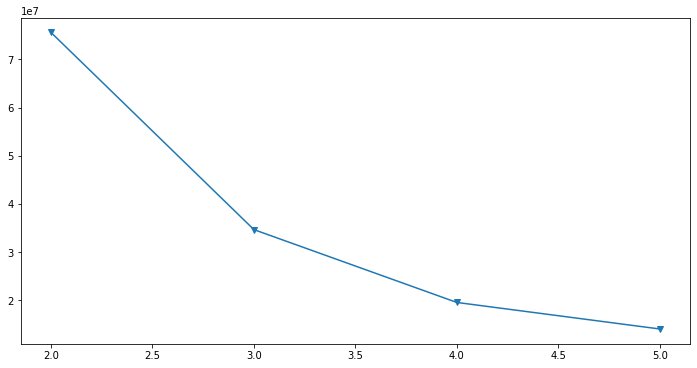

In [19]:
# After obtaining the sum of inertia for each cluster, I'll calculate the 
# Elbow plot

plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'v')

# What does the Elbow Plot tells us?

### Naturally, there are 3 clusters occuring within the dataset based on the 'origin'. 
### At 4 clusters, however, the error is less than at 3 clusters.




In [29]:
# So, I'll continue by building 4 clusters

cluster = KMeans( n_clusters = 4, random_state = 2345)
cluster.fit(mpg_df_attr_z)

#Creating a mirror copy for later reuse

# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
#Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).


mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

In [30]:
## The table below shows the position of the centroids across different dimensions. (Centroid 1, 2, 3, 4)

centroids = cluster.cluster_centers_

centroids

array([[-1.10752945e+00,  1.46488293e+00,  1.46287095e+00,
         1.47872888e+00,  1.36299163e+00, -1.06729788e+00,
         1.00000000e+00],
       [ 3.00768587e-01, -8.12113961e-01, -6.98526639e-01,
        -3.95735419e-01, -5.97369210e-01, -7.48126337e-02,
         2.00000000e+00],
       [ 1.28723941e+00, -8.31324357e-01, -9.20553642e-01,
        -9.69448437e-01, -9.92566180e-01,  8.58199415e-01,
        -2.66453526e-15],
       [-5.35034187e-01,  3.69447377e-01,  2.98946850e-01,
        -1.23967175e-01,  3.47016641e-01,  4.58964788e-01,
         3.00000000e+00]])

In [31]:

centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr_z))

centroid_df

,mpg,cyl,disp,hp,wt,acc,GROUP
0,-1.107529,1.464883,1.462871,1.478729,1.362992,-1.067298,1.000000e+00
1,0.300769,-0.812114,-0.698527,-0.395735,-0.597369,-0.074813,2.000000e+00
2,1.287239,-0.831324,-0.920554,-0.969448,-0.992566,0.858199,-2.664535e-15
3,-0.535034,0.369447,0.298947,-0.123967,0.347017,0.458965,3.000000e+00


In [32]:
prediction = cluster.predict(mpg_df_attr_z)

mpg_df_attr_z['GROUP'] = prediction # creating a new column which will hold the cluster id for each record

# Instead of interpreting the numerical values of the centroids, let's do a visual analysis by converting the centroids and the data in the cluster into boxplots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001214A0C8>,
      dtype=object)

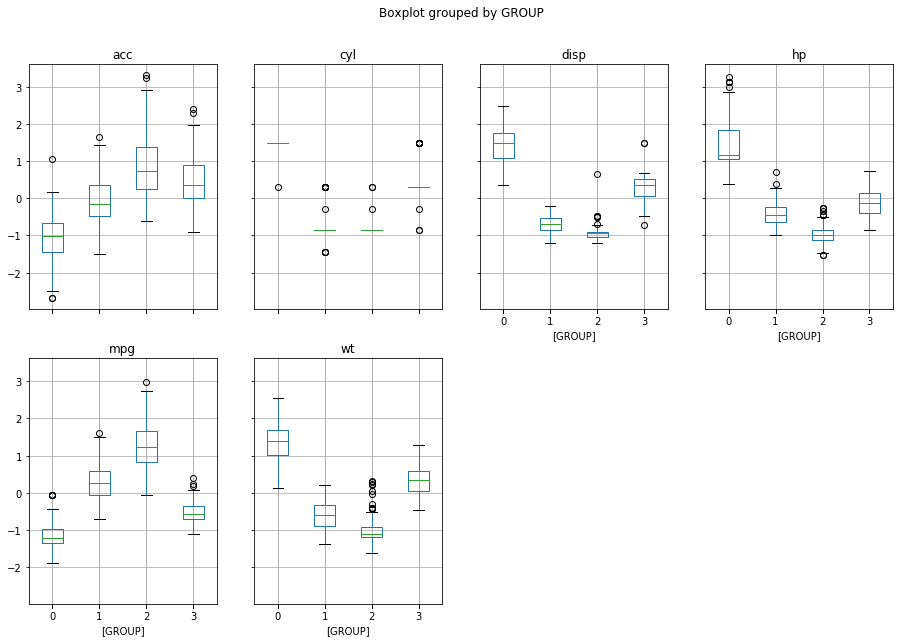

In [33]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP', layout = (2,4), figsize = (15, 10))

# identifying and handling (removing) outliers 

In [35]:
# Addressing outliers on group level

data = mpg_df_attr_z #renaming the dataset to save time on typing

def replace(group):
    median, std = group.median(), group.std() # get the median and standard deviation of every group
    outliers = (group - median).abs() > 2*std # subtract median from every member of each group. take absolute values.
                                              # identifying any data point beyond 2 standard deviations as outliers
    group[outliers]= group.median() # replacing the identified outliers with group medians
    return group


data_corrected = (data.groupby('GROUP').transform(replace))
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))

C:\Users\alimojadam\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000144D2A08>,
      dtype=object)

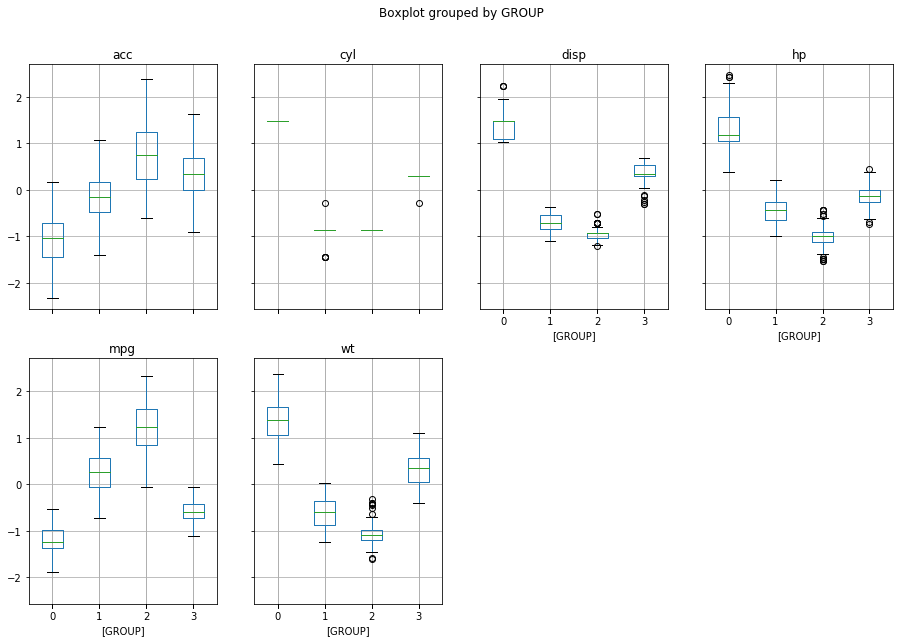

In [37]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize = (15,10))

### Note: When we removed outliers and replace with median or mean, the distribution shape shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the center than original outliers so we accept them without modifying them.

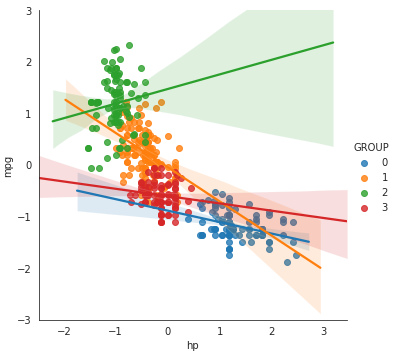

In [49]:

# As we see in the second set of box plots, however, the distribution of
# our clusters are still overlapping.

# mpg vs hp -- miles per gallon vs horse power
var = 'hp'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'mpg', data = concat_data, hue = 'GROUP')
    
plot.set(ylim = (-3,3))

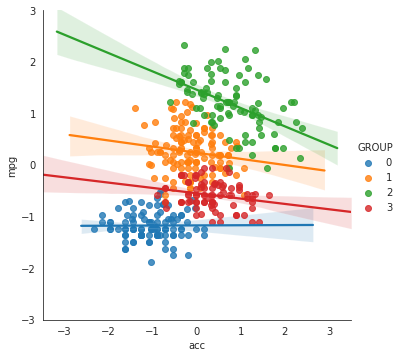

In [50]:
# mpg vs acc - miles per gallon vs acceleration

var = 'acc'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'mpg', data = concat_data, hue = 'GROUP')

plot.set(ylim = (-3,3))

In [ ]:
# above we can see that "acceleration" is a useless predictr of "miles per gallon" become most clusters seem to have a flat relationship
# with 'mpg' axis (i.e. all cars in each cluster have the same relationship with 'mpg')